<a href="https://colab.research.google.com/github/Dhanasree-Rajamani/Deep_Learning_Assignments/blob/main/Deep%20Learning%20Assignment%201/FastAI_Classification_ddg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Fast AI cnn learner to perform classification

Training images using Duck duck go search 

Training with images of airplanes and cars

Model classifies validation images as car or airplanes 

Import statements

In [ ]:
from PIL import Image
import requests, io, cv2
from fastai.vision.all import *

In [ ]:
urls = search_images_ddg('car photos', max_images =1)
len(urls), urls[0]

(1,
 'https://www.hdcarwallpapers.com/walls/lexus_is_f_ccs_r_race_car_2012-wide.jpg')

Searching car and airplane images from duck duck go and saving for validation

In [ ]:
dest = Path('car.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=False)

In [ ]:
urls = search_images_ddg('airplane photos', max_images =1)
len(urls), urls[0]

(1,
 'https://hdwallpaperim.com/wp-content/uploads/2017/08/25/463391-Swedish-aircraft-military_aircraft-JAS-39_Gripen-Swedish_Air_Force-Swedish_Army-jet_fighter-vehicle-airplane.jpg')

In [ ]:
dest2 = Path('airplane.jpg')
if not dest2.exists(): download_url(urls[0], dest2, show_progress=False)

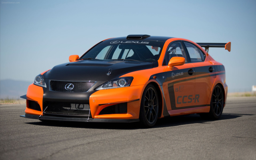

In [ ]:
im = Image.open(dest)
im.to_thumb(256,256)

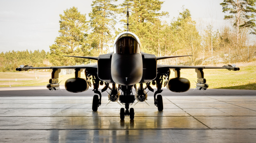

In [ ]:
im = Image.open(dest2)
im.to_thumb(256,256)

Search Duck duck go for airplane and car images and download for training

In [ ]:
searches = ['car', 'airplane']
path = Path('airplane_or_car')

#if not path.exists():
for o in searches:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents=True)
  results = search_images_ddg(f'{o} photo')
  download_images(dest, urls=results[:200])
  resize_images(dest, max_size=400, dest=dest)

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Remove images which are corrupt/invalid

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#19) [None,None,None,None,None,None,None,None,None,None...]

Training model with the images downloaded in path

Splitting dataset into training and validation

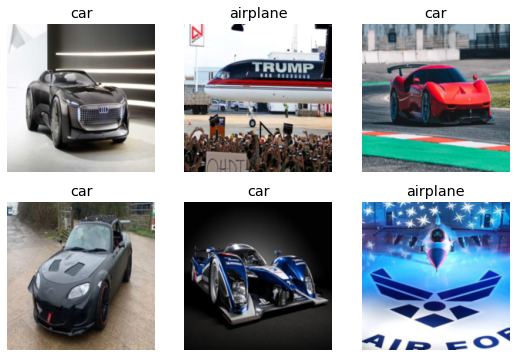

In [ ]:
dls = DataBlock(blocks = (ImageBlock, CategoryBlock), get_items=get_image_files, splitter=RandomSplitter(valid_pct=0.2, seed=42), get_y=parent_label, item_tfms =[Resize(192, method='squish')]).dataloaders(path)
dls.show_batch(max_n=6)

Assign model name as Learn

In [ ]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pt

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.104588,0.092546,0.040541,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.167000,0.038010,0.013514,00:48
1,0.099940,0.020142,0.000000,00:48
2,0.065136,0.011516,0.000000,00:50


Test and Validate model

In [ ]:
is_what = learn.predict('car.jpg')
print(is_what)

('car', TensorBase(1), TensorBase([2.0621e-06, 1.0000e+00]))


In [ ]:
is_what = learn.predict('airplane.jpg')
print(is_what)

('airplane', TensorBase(0), TensorBase([0.9922, 0.0078]))
